In [ ]:
import warnings; 
warnings.simplefilter('ignore')

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.5 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 45 kB 2.7 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6641441 sha256=656e203e0d423a50eb0ea0aed48bee1df313f25604735218d0d1dc9c3ce7e7bd
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd

import io

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Shoe_sales_raw-data.csv to Shoe_sales_raw-data.csv


In [ ]:
df2 = pd.read_csv(io.BytesIO(uploaded['Shoe_sales_raw-data.csv']))
print(df2.head())

   InvoiceNo      Date         Country  ProductID  Shop  Gender  Size (US)  \
0      52389  1/1/2014  United Kingdom       2152   UK2    Male       11.0   
1      52390  1/1/2014   United States       2230  US15    Male       11.5   
2      52391  1/1/2014          Canada       2160  CAN7    Male        9.5   
3      52392  1/1/2014   United States       2234   US6  Female        9.5   
4      52393  1/1/2014  United Kingdom       2222   UK4  Female        9.0   

  Size (Europe)  Size (UK)  UnitPrice  Discount  Year  Month  SalePrice  
0            44       10.5        159       0.0  2014      1      159.0  
1         44-45       11.0        199       0.2  2014      1      159.2  
2         42-43        9.0        149       0.2  2014      1      119.2  
3            40        7.5        159       0.0  2014      1      159.0  
4         39-40        7.0        159       0.0  2014      1      159.0  


In [ ]:
df2.describe()

,InvoiceNo,ProductID,Size (US),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
count,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000
mean,59050.261509,2195.325115,9.195630,8.089497,164.171377,0.124013,2015.308211,6.689517,143.987913
std,3889.598714,27.633526,1.511719,1.970014,22.940544,0.170112,0.762320,3.319909,35.180799
min,52389.000000,2147.000000,4.500000,2.500000,129.000000,0.000000,2014.000000,1.000000,64.500000
25%,55648.500000,2172.000000,8.000000,6.500000,149.000000,0.000000,2015.000000,4.000000,125.100000
50%,59092.000000,2195.000000,9.000000,8.500000,159.000000,0.000000,2015.000000,7.000000,149.000000
75%,62433.000000,2219.000000,10.000000,9.500000,179.000000,0.200000,2016.000000,10.000000,169.000000
max,65777.000000,2242.000000,15.000000,14.500000,199.000000,0.500000,2016.000000,12.000000,199.000000


In [ ]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceNo      14967 non-null  int64  
 1   Date           14967 non-null  object 
 2   Country        14967 non-null  object 
 3   ProductID      14967 non-null  int64  
 4   Shop           14967 non-null  object 
 5   Gender         14967 non-null  object 
 6   Size (US)      14967 non-null  float64
 7   Size (Europe)  14967 non-null  object 
 8   Size (UK)      14967 non-null  float64
 9   UnitPrice      14967 non-null  int64  
 10  Discount       14967 non-null  float64
 11  Year           14967 non-null  int64  
 12  Month          14967 non-null  int64  
 13  SalePrice      14967 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.6+ MB


In [ ]:
df2['Date'] = pd.to_datetime(df2.Date)

In [ ]:
df1 = df2.groupby('Date').SalePrice.sum()

In [ ]:
df = df1.to_frame()

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df

,SalePrice
Date,
2014-01-01,914.4
2014-01-02,1195.1
2014-01-03,1159.6
2014-01-04,1087.5
2014-01-05,876.4
...,...
2016-12-27,2156.5
2016-12-28,1770.3
2016-12-29,2243.7


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

,Date,SalePrice
0,2014-01-01,914.4
1,2014-01-02,1195.1
2,2014-01-03,1159.6
3,2014-01-04,1087.5
4,2014-01-05,876.4
...,...,...
1091,2016-12-27,2156.5
1092,2016-12-28,1770.3
1093,2016-12-29,2243.7
1094,2016-12-30,2269.2


In [ ]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2014-01-01,914.4
1,2014-01-02,1195.1
2,2014-01-03,1159.6
3,2014-01-04,1087.5
4,2014-01-05,876.4


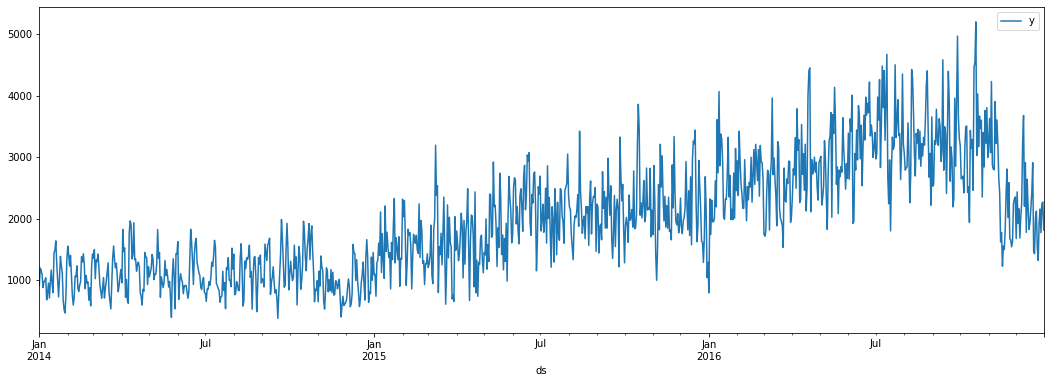

In [ ]:
df.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1091,2016-12-27,3556.864826,2703.008165,3824.108175,3425.584198,3699.495799,-256.625487,-256.625487,-256.625487,50.822187,50.822187,50.822187,-307.447674,-307.447674,-307.447674,0.0,0.0,0.0,3300.239340
1092,2016-12-28,3559.878110,2686.117911,3749.384263,3428.407778,3703.236388,-340.350827,-340.350827,-340.350827,-34.358342,-34.358342,-34.358342,-305.992484,-305.992484,-305.992484,0.0,0.0,0.0,3219.527283
1093,2016-12-29,3562.891394,2684.990206,3776.671209,3431.231358,3707.142924,-328.100642,-328.100642,-328.100642,-26.043227,-26.043227,-26.043227,-302.057415,-302.057415,-302.057415,0.0,0.0,0.0,3234.790752
1094,2016-12-30,3565.904678,2700.663907,3743.731351,3434.054938,3711.029196,-353.972183,-353.972183,-353.972183,-58.490513,-58.490513,-58.490513,-295.481670,-295.481670,-295.481670,0.0,0.0,0.0,3211.932495
1095,2016-12-31,3568.917961,2745.560424,3879.633020,3436.878518,3714.731814,-269.361928,-269.361928,-269.361928,16.797531,16.797531,16.797531,-286.159459,-286.159459,-286.159459,0.0,0.0,0.0,3299.556033


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1091,2016-12-27,3300.239340,2703.008165,3824.108175
1092,2016-12-28,3219.527283,2686.117911,3749.384263
1093,2016-12-29,3234.790752,2684.990206,3776.671209
1094,2016-12-30,3211.932495,2700.663907,3743.731351
1095,2016-12-31,3299.556033,2745.560424,3879.633020


In [ ]:
test.tail()

,ds,y
1091,2016-12-27,2156.5
1092,2016-12-28,1770.3
1093,2016-12-29,2243.7
1094,2016-12-30,2269.2
1095,2016-12-31,1812.4


In [ ]:
plot_plotly(m ,forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
predictions = forecast.iloc[-365:]['yhat']

In [ ]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  719.6400904337992
Mean Value of Test Dataset: 2886.2928767123267
